https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
#from matplotlib import style
#import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
#plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
datos = pd.read_csv('rutUnicos_final.csv', sep=";")

In [3]:
# Reemplazo variables categoricas, utilizaremos LabelEncoder
#========================================================================
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, Normalizer
Columnas_Categoricas=['Mensualidad_Establecimiento_final', 'Region_Establecimiento_final','Segunda_Institucion_ES_final']
df_prep=datos
LabelsEnc = LabelEncoder()
for i in Columnas_Categoricas:
  df_prep[i] = LabelsEnc.fit_transform(datos[i])
datos=df_prep

In [4]:
# División de los datos en train y test
# ==============================================================================
#X = datos[['Anio_Nacimiento_final','Quintil_Final','Sexo_cod','Anio_Egreso_EM_final','Nota_Egreso_EM_final2','Mensualidad_Establecimiento_final','Region_Establecimiento_final','Anios_Estudiando_ES_final','Dependencia_Establecimiento_cod']]
#X = datos[['Anio_Egreso_EM_final','Anio_Inicio_Gratuidad_final','Anio_Nacimiento_final','Anios_con_Gratuidad_final','Anios_Duracion_Carrera_Origen_final','Anios_Estudiando_Carrera_Origen_final','Anios_Estudiando_ES_final','Cantidad_asignaciones_final','Cantidad_Postulaciones_final','Dependencia_Establecimiento_cod','Institucio_Inicio_Gratuidad_cod','Mensualidad_Establecimiento_final','Nota_Egreso_EM_final2','Quintil_Final','Region_Establecimiento_final','Segunda_Institucion_ES_final','Sexo_cod','Tipo_Carrera_Origen_cod']]
X = datos[['Anio_Egreso_EM_final','Anio_Nacimiento_final','Anios_Duracion_Carrera_Origen_final','Anios_Estudiando_Carrera_Origen_final','Anios_Estudiando_ES_final','Cantidad_asignaciones_final','Cantidad_Postulaciones_final','Dependencia_Establecimiento_cod','Mensualidad_Establecimiento_final','Nota_Egreso_EM_final2','Quintil_Final','Region_Establecimiento_final','Segunda_Institucion_ES_final','Sexo_cod','Tipo_Carrera_Origen_cod']]
y = datos['Gana_Gratuidad_final']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8, #regla 80-20%
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Aunque el valor óptimo de  λ  es aquel con el que se minimiza el error de validación cruzada, una práctica extendida es utilizar, en lugar de este, el mayor valor de  λ  que se aleja menos de una desviación típica del óptimo. De este modo, se consigue un modelo más sencillo (excluye más predictores) pero cuya capacidad predictiva es similar a la conseguida con el modelo más complejo.

## Nota: scikitlearn utiliza el argumento alpha para hacer referencia a lambda y el argumento l1ratio para referirse a alpha.

# Encontrar el mejor modelo implica identificar el valor óptimo del hiperparámetro de regularización lambda ( λ ). Al tratarse de un hiperparámetro, no hay forma de saber de antemano qué valor es el adecuado. Una forma de lograrlo es emplear validación cruzada o generalized cross validation, esta última es una adaptación eficiente de leave-one-out cross validation disponible para la regulación Ridge. Con scikit learn esto puede conseguirse fácilmente de dos formas:

# Combinar GridSearchCV y un modelo de tipo Ridge, Lasso o ElasticNet.

# Emplear RidgeCV, LassoCV o ElasticNetCV. Son adaptaciones que incorporan validación cruzada. Si no se indica nada en el argumento cv, en RidgeCV, se aplica Generalized Cross-Validation (GCV). Si se le indica un valor entero, se aplica validación cruzada con GridSearchCV. Por ejemplo cv=10 equivale a 10-fold cross-validation, en lugar de Generalized Cross-Validation.

# Por lo general, las versiones que incorporan la validación cruzada son más directas y cómodas de utilizar, sin embargo, hay situaciones para las que no son adecuadas. Por ejemplo, si los datos tienen un orden temporal (series temporales),

In [5]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

# Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida  que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

In [6]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

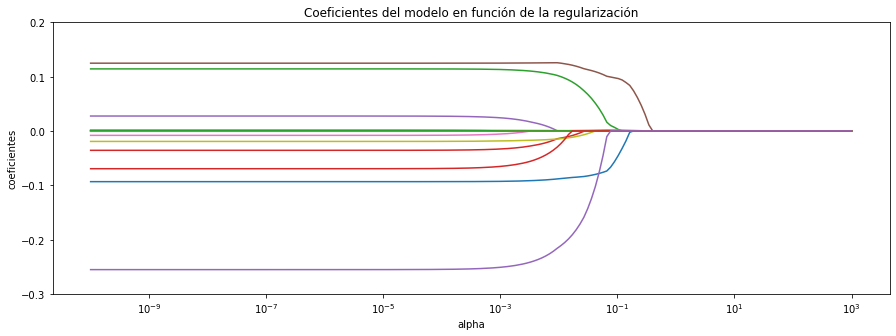

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-0.3,0.2])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

# Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y más predictores quedan excluidos (su coeficiente es 0).

In [8]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

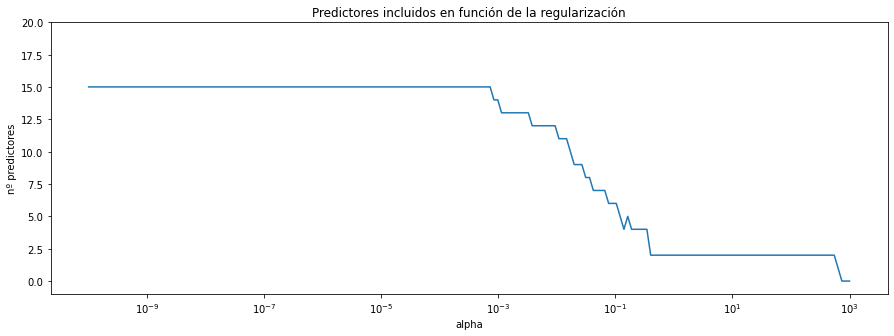

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')A
ax.set_ylim([-1,20])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

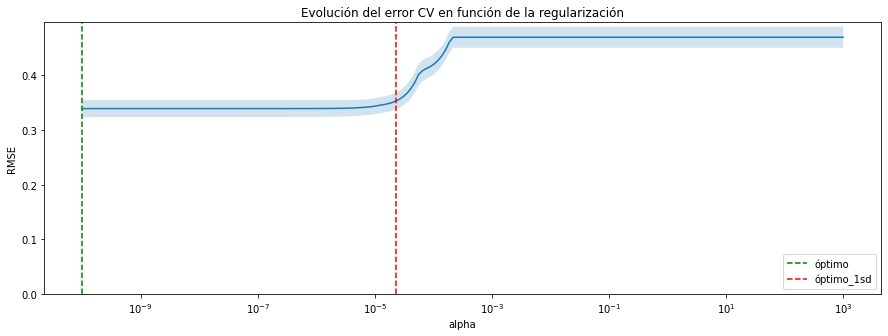

In [10]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "green",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "red",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [11]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [12]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [2.27396575e-05]


# Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada.

In [13]:
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([2.27396575e-05]), normalize=True)

In [14]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
1,Anio_Nacimiento_final,0.000141
2,Anios_Duracion_Carrera_Origen_final,0.068036
5,Cantidad_asignaciones_final,0.118045
10,Quintil_Final,-0.056552
14,Tipo_Carrera_Origen_cod,-0.155158


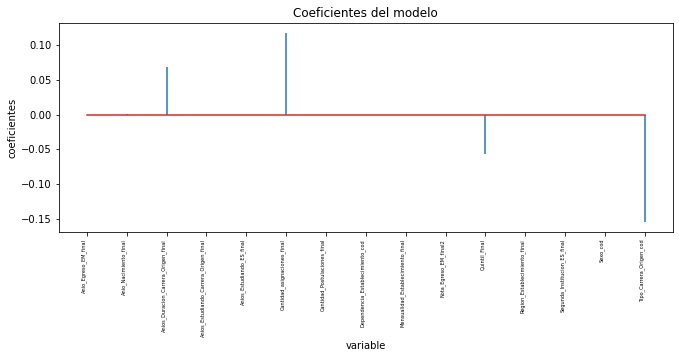

In [15]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [16]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([-0.02235966,  0.42063961,  0.51974111, -0.0410203 ,  0.02645052,
        0.38380973,  0.02701609,  0.68680746,  0.39472876,  0.12835229])

In [17]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 0.35298561157541614
